# Maximum Likelihood Estimation (MLE)

Outline:
1. Difference between probability and likelihood. Good to learn what likelihood is, before maximizing it
2. Deriving MLEs for Normal dist parameters μ, σ
3. Proving (2) with a grid search implementation
4. MLE Population size estimation with capture-recapture
5. MLE Population size estimation in discrete uniform  (German Tank Problem)
6. Properties of the MLE

Summary:
- Probability answers "Given this probability, area of the PDF where X satisfies ..."
- Likelihood answers "Given these data, what's the y-axis value of the PDF where the parameters are ..."
- MLE's logic is to fit a distribution to data, estimated parameters are those w/ max. likelihood
- MLE found by taking the log of the likelihood function, then for each parameter: taking partial derivatives, setting it to 0 and solving for the parameter
- A grid search approach using maximum likelihood works as well, yet it's obviously more computationally complex
    - Do we need grid search? No if we know about the PDF and if it's differentiable. The PDF is always continuous, but there are     PDFs that are continuous but not differentiable (e.g. Laplace Dist).
- Sample mean and sample stdev are the MLEs for the parameters of the Normal dist
- As you have more data, MLE converges to 0 bias and minimum variance among all the estimators having 0 bias

*Adapted from StatQuest - Josh Starmer*

For some math + examples: [MIT - Maximum Likelihood Estimates](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading10b.pdf)

---

## Difference btwn Probability and Likelihood
**Story:** We have a continuous random variable X: Mouse weights in grams. X ~ Normal(μ, σ). μ = 32, σ = 2.5

**Probability:** "Given X ~ N(32, 2.5), what's the **area** between 32 <= X <= 34?"  
In math: `P(32 <= X <= 34 | μ = 32, σ = 2.5)` In more general terms, `P(data | distribution)`

**Likelihood:** We already **know the weight** of the mouse/mice. The unknown is the parameters of the distribution. "What's the likelihood of the parameters being μ = 32, σ = 2.5, given we measured an 34 gram mouse?" We **don't look for an area under the curve, just a y-axis value.**  
In math: `L(μ = 32, σ = 2.5 | X = 34)` In more general terms, `L(distribution | data)`

**In discrete distributions, probability and likelihood are the same. In the continous case, probability is an area, likelihood is a y-axis value.**

In [1]:
# coding the example above
# generating a population following normal dist

from scipy.stats import norm

N = 100000  # population size
MU, SIGMA = 32, 2.5  # population mean and stdev
data = norm.rvs(loc=MU, scale=SIGMA, size=N, random_state=42)

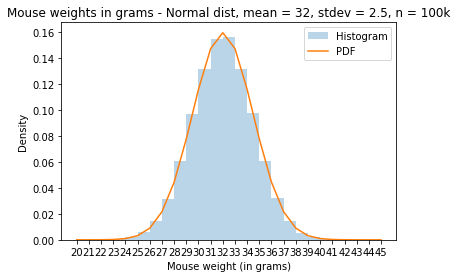

In [2]:
# plotting the histogram of the population
# and the PDF of the normal dist

import matplotlib.pyplot as plt

x = [num for num in range(20, 46)]  # x-axis
rv = norm(loc=MU, scale=SIGMA)  # our random variable
PDF, CDF = rv.pdf(x), rv.cdf(x)  # PDF, CDF for data btwn 22 and 43 

# histogram
plt.hist(data, bins=x, density=True, alpha=0.3, label="Histogram")
plt.plot(x, PDF, label="PDF")
plt.title("Mouse weights in grams - Normal dist, mean = 32, stdev = 2.5, n = 100k")
plt.legend()
plt.xticks(x)
plt.ylabel("Density")
plt.xlabel("Mouse weight (in grams)")
plt.show()

In [3]:
IDX_START = 20  # PDF[num - IDX_START] = PDF[idx of the num]

# Given mean = 32, stdev = 2.5, probability of 32 <= X <= 34
# CDF(34) - CDF(32) calculates it
prob = round(CDF[34 - IDX_START] - CDF[32 - IDX_START], 5)
print("Given mean = 32, stdev = 2.5, probability of 32 <= X <= 34:")
print(f"P(32 <= X <= 34 | μ = 32, σ = 2.5) = {prob}")

# Given observation = 34, likelihood of mean = 32, stdev = 2.5?
likelihood = round(PDF[34 - IDX_START], 5)
print("\nGiven observation = 34, likelihood of mean = 32, stdev = 2.5?")
print(f"L(μ = 32, σ = 2.5 | X = 34) = {likelihood}")

# Given observation = 34, likelihood of mean = 34, stdev = 2.5?
# ***Notice that we shifted the mean of the distribution to 34.***
new_rv = norm(loc=34, scale=2.5)
likelihood = round(new_rv.pdf(x)[34 - IDX_START], 5)
print("\nGiven observation = 34, likelihood of mean = 34, stdev = 2.5?")
print(f"L(μ = 34, σ = 2.5 | X = 34) = {likelihood}")

Given mean = 32, stdev = 2.5, probability of 32 <= X <= 34:
P(32 <= X <= 34 | μ = 32, σ = 2.5) = 0.28814

Given observation = 34, likelihood of mean = 32, stdev = 2.5?
L(μ = 32, σ = 2.5 | X = 34) = 0.11588

Given observation = 34, likelihood of mean = 34, stdev = 2.5?
L(μ = 34, σ = 2.5 | X = 34) = 0.15958


---

## Maximum Likelihood Estimation for Normal Dist
**Story:** The same story above. We'll use the same data

**Goal:** Given the sample mean and stdev, find parameters μ, σ such that the likelihood of the sample mean and sample stdev coming from μ, σ is maximum. Finding these parameters allows us to fit a distribution into the data

**Steps:**
1. Estimate μ by trying different values, fix σ.
2. Estimate σ by trying different values, fix μ

### Example: One data point

We'll **only estimate μ** of the distribution here, since we can't estimate σ with only one data point.   
With **one data point, σ = 0, which makes normal dist undefined**

Question: Assuming σ = 1, and the only data point x1 = 32, find μ* maximizing `L(μ*, 1 | X = 32)`

In [4]:
# using a grid-search like approach for verbosity
# i made up the mu_values bounds for gridsearch, there's no special logic in that here

import numpy as np

mu_step = 0.1
mu_values = np.arange(20, 46 + mu_step, mu_step)
x1 = 32
assumed_sigma = 1
best_mu = {"mu": None, "likelihood": -9999}

for mu in mu_values:
    likelihood = norm.pdf(x1, loc=mu, scale=assumed_sigma)
    print(f"μ = {round(mu, 1)}, likelihood = {round(likelihood, 5)}")
    if likelihood > best_mu["likelihood"]:
        best_mu = {"mu": round(mu, 1), "likelihood": round(likelihood, 5)}
print(f"\nμ* = {best_mu['mu']}, likelihood = {best_mu['likelihood']}")

μ = 20.0, likelihood = 0.0
μ = 20.1, likelihood = 0.0
μ = 20.2, likelihood = 0.0
μ = 20.3, likelihood = 0.0
μ = 20.4, likelihood = 0.0
μ = 20.5, likelihood = 0.0
μ = 20.6, likelihood = 0.0
μ = 20.7, likelihood = 0.0
μ = 20.8, likelihood = 0.0
μ = 20.9, likelihood = 0.0
μ = 21.0, likelihood = 0.0
μ = 21.1, likelihood = 0.0
μ = 21.2, likelihood = 0.0
μ = 21.3, likelihood = 0.0
μ = 21.4, likelihood = 0.0
μ = 21.5, likelihood = 0.0
μ = 21.6, likelihood = 0.0
μ = 21.7, likelihood = 0.0
μ = 21.8, likelihood = 0.0
μ = 21.9, likelihood = 0.0
μ = 22.0, likelihood = 0.0
μ = 22.1, likelihood = 0.0
μ = 22.2, likelihood = 0.0
μ = 22.3, likelihood = 0.0
μ = 22.4, likelihood = 0.0
μ = 22.5, likelihood = 0.0
μ = 22.6, likelihood = 0.0
μ = 22.7, likelihood = 0.0
μ = 22.8, likelihood = 0.0
μ = 22.9, likelihood = 0.0
μ = 23.0, likelihood = 0.0
μ = 23.1, likelihood = 0.0
μ = 23.2, likelihood = 0.0
μ = 23.3, likelihood = 0.0
μ = 23.4, likelihood = 0.0
μ = 23.5, likelihood = 0.0
μ = 23.6, likelihood = 0.0
μ

### Working with >1 data points

Now that we have >1 data points, we can estimate both μ and σ.  

If question is: Data is x1 = 32, x2 = 34. Find μ*, σ* maximizing `L(μ*, σ* | x1 = 32, x2 = 34)`  
Do it this way: `L(μ*, σ* | x1 = 32, x2 = 34) = L(μ*, σ* | x1 = 32) * L(μ*, σ* | x1 = 34)`  

Generalized: `L(μ*, σ* | x1, x2, ..., xn) = product(L(μ*, σ* | xi) for i = 1 to n)`  
Note that this [assumes iid for the data](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)

### Deriving the MLE for Normal Dist
Thankfully, we won't have to try different values and compute the function above. It's really costly if N large

- 1) Take the log of the likelihood function for fast differentiation
    - The likelihood function turns from product-of-stuff to sum-of-logarithms
    - The final form: `(-n / 2)ln(2π) - (n)ln(σ) -sum((xi - μ)^2 / 2σ^2 for i = 1 to n)`
- 2) Estimating μ:
    - 2.1) Take derivative wrt μ to find the peak of the log-likelihood curve
        - Final form: `(1 / σ^2) * (sum(xi for i = 1 to n) - nμ)`
    - 2.2) Set derivative = 0, solve for μ
        - Final form: `μ* = sum(xi for i = 1 to n) / n`
        - **This is the sample mean! Sample mean is the MLE for μ for Normal dist**

- 3) Estimating σ:
    - 3.1) Take derivative wrt σ to find the peak of the log-likelihood curve
        - Final form: `(-n / σ) + (1 / σ^3) * sum((xi - μ)^2 for i = 1 to n)`
        - Plug μ* for μ in the equation
    - 3.2) Set derivative = 0, solve for σ
        - Final form: `σ* = sqrt(sum(xi - μ)^2 / n)`
        - **This is the sample stdev! Sample stdev is the MLE for σ for Normal dist**


**Note: Do the math on your own as well to match the result.**

---

## Proving that MLE works, using the other way around: Grid search
Let's try to see that whether computing with the complex formula above leads us to the same thing. We'll do some form of a grid search. Define possible mu and sigma values, test each of them, take the one with maximum likelihood. Our goal here is to show the process step by step

Goal is to maximize: `sum(ln(L(μ*, σ* | xi)) for i = 1 to n)`

The only difference from the computationally complex object function `product(L(μ*, σ* | xi) for i = 1 to n)` is that I decided to do sum of log-likelihoods to prevent integer overflow. Computers have a limit on the numbers they can process as well.

Note that there is a reason why we did all the stuff above to arrive at simpler ways. You can see the reason directly by increasing N to 10K, 100K, or 1 million.

In [5]:
from math import log
import math

# generating data
N = 100  # population size
MU, SIGMA = 36, 1.8  # population mean and stdev
data = norm.rvs(loc=MU, scale=SIGMA, size=N, random_state=42)

def get_log_likelihood(values, loc, scale):
    log_likelihood = 1
    for el in values:
        log_likelihood += log(norm.pdf(el, loc=loc, scale=scale))
    return log_likelihood

# 1. estimate mu, assume sigma = 1
# i made up the mu_values bounds for gridsearch, there's no special logic in that here
mu_step = 0.1
mu_values = np.arange(20, 50 + mu_step, mu_step)
assumed_sigma = 1
best_mu = {"mu": None, "log_likelihood": -9999}
for mu in mu_values:
    log_likelihood = get_log_likelihood(data, loc=mu, scale=assumed_sigma)
    print(f"μ = {round(mu, 1)}, log_likelihood = {log_likelihood}")
    if log_likelihood > best_mu["log_likelihood"]:
        best_mu = {"mu": round(mu, 1), "log_likelihood": log_likelihood}

# 2. estimate sigma, mu is fixed
# i made up the sigma_values bounds for gridsearch, there's no special logic in that here
sigma_step = 0.1
sigma_values = np.arange(1, 4 + sigma_step, sigma_step)
best_sigma = {"sigma": None, "log_likelihood": -9999}
for sigma in sigma_values:
    log_likelihood = get_log_likelihood(data, loc=best_mu["mu"], scale=sigma)
    print(f"σ = {round(sigma, 1)}, log_likelihood = {log_likelihood}")
    if log_likelihood > best_sigma["log_likelihood"]:
        best_sigma = {"sigma": round(sigma, 1), "log_likelihood": log_likelihood}

# 3. we're done
print()
print(f"μ* = {best_mu['mu']}, log_likelihood = {best_mu['log_likelihood']}")
print(f"σ* = {best_sigma['sigma']}, log_likelihood = {best_sigma['log_likelihood']}")

μ = 20.0, log_likelihood = -12725.839502832214
μ = 20.1, log_likelihood = -12568.208740145306
μ = 20.2, log_likelihood = -12411.577977458392
μ = 20.3, log_likelihood = -12255.947214771488
μ = 20.4, log_likelihood = -12101.31645208458
μ = 20.5, log_likelihood = -11947.685689397671
μ = 20.6, log_likelihood = -11795.05492671076
μ = 20.7, log_likelihood = -11643.424164023849
μ = 20.8, log_likelihood = -11492.793401336941
μ = 20.9, log_likelihood = -11343.16263865003
μ = 21.0, log_likelihood = -11194.531875963126
μ = 21.1, log_likelihood = -11046.901113276228
μ = 21.2, log_likelihood = -10900.270350589308
μ = 21.3, log_likelihood = -10754.6395879024
μ = 21.4, log_likelihood = -10610.008825215493
μ = 21.5, log_likelihood = -10466.378062528587
μ = 21.6, log_likelihood = -10323.74729984168
μ = 21.7, log_likelihood = -10182.116537154772
μ = 21.8, log_likelihood = -10041.485774467865
μ = 21.9, log_likelihood = -9901.855011780955
μ = 22.0, log_likelihood = -9763.224249094046
μ = 22.1, log_likelih

μ = 38.3, log_likelihood = -532.4099311284227
μ = 38.4, log_likelihood = -557.7791684415193
μ = 38.5, log_likelihood = -584.1484057546161
μ = 38.6, log_likelihood = -611.5176430677132
μ = 38.7, log_likelihood = -639.88688038081
μ = 38.8, log_likelihood = -669.2561176939064
μ = 38.9, log_likelihood = -699.6253550070031
μ = 39.0, log_likelihood = -730.9945923201
μ = 39.1, log_likelihood = -763.3638296331967
μ = 39.2, log_likelihood = -796.7330669462934
μ = 39.3, log_likelihood = -831.1023042593907
μ = 39.4, log_likelihood = -866.4715415724879
μ = 39.5, log_likelihood = -902.8407788855847
μ = 39.6, log_likelihood = -940.2100161986812
μ = 39.7, log_likelihood = -978.5792535117787
μ = 39.8, log_likelihood = -1017.9484908248758
μ = 39.9, log_likelihood = -1058.3177281379726
μ = 40.0, log_likelihood = -1099.6869654510701
μ = 40.1, log_likelihood = -1142.0562027641665
μ = 40.2, log_likelihood = -1185.4254400772645
μ = 40.3, log_likelihood = -1229.7946773903618
μ = 40.4, log_likelihood = -1275.

In [6]:
# comparing the estimates with sample mean and sample stdev
# we already know that MLEs for normal dist are sample mean and sample stdev
# so if our logic is true, than this equality must hold

sample_mean, sample_stdev = round(np.mean(data), 1), round(np.std(data), 1)  # the step in our grid search was 0.1
best_mu["mu"] == sample_mean and best_sigma["sigma"] == sample_stdev

True

---

## Example: Population size estimation with capture-recapture

Assume each animal is equally likely to be captured. First, 10 animals are captured, tagged, and released. Then 20 animals are captured, tagged released. 4 of these 20 were tagged before. MLE for the population size n?

Likelihood function is: `L(n | data) = C(n - 10, 16) * C(10, 4) / C(n, 20)`  
In plain English: (16 chosen out of previously untagged n - 10) * (4 chosen out of previously tagged 10) / (20 chosen out of n)

Doing a grid search is enough given the simplicity of the problem

In [7]:
from math import comb

step = 1
n_lower_bound = 26
n_upper_bound = 100
n_values = np.arange(n_lower_bound, n_upper_bound + step, step)
best_n = {"n": None, "likelihood": -9999}
for n in n_values:
    likelihood = comb(n - 10, 16) * comb(10, 4) / comb(n, 20)
    print(f"n = {n}, likelihood = {likelihood}")
    if likelihood > best_n["likelihood"]:
        best_n = {"n": n, "likelihood": likelihood}
        
print()
print(f"n* = {best_n['n']}, likelihood = {likelihood}")

n = 26, likelihood = 0.0009121313469139556
n = 27, likelihood = 0.004020134454917064
n = 28, likelihood = 0.010337488598358164
n = 29, likelihood = 0.02031851207263501
n = 30, likelihood = 0.03386418678772502
n = 31, likelihood = 0.050468562244932125
n = 32, likelihood = 0.06939427308678167
n = 33, likelihood = 0.08982202447163515
n = 34, likelihood = 0.11095661846496106
n = 35, likelihood = 0.13209121245828698
n = 36, likelihood = 0.15263873439624273
n = 37, likelihood = 0.17214048915939906
n = 38, likelihood = 0.19026054064986211
n = 39, likelihood = 0.2067723035464971
n = 40, likelihood = 0.2215417537998183
n = 41, likelihood = 0.23451005158322233
n = 42, likelihood = 0.24567719689670908
n = 43, likelihood = 0.2550875409638881
n = 44, likelihood = 0.2628174664476423
n = 45, likelihood = 0.2689652434405696
n = 46, likelihood = 0.27364289984823165
n = 47, likelihood = 0.27696986519593053
n = 48, likelihood = 0.27906812175044515
n = 49, likelihood = 0.28005860310537134
n = 50, likeliho

Observe that both n* = 49 and n* = 50 is possible, they have the same likelihood

---

## Example: Population size estimation in Discrete Uniform (German Tank Problem)

In a class, students can have numbers 1 to n, n being the num of students. n can be at most 30.  
The numbers follow a discrete uniform dist. And each student's number is unique.  
Three students are chosen randomly, with the numbers: 1, 3, 7. MLE for n?

PMF of discrete uniform: `1 / n`

Likelihood: `L(n | 1, 3, 7) = product(1 / n for i = 1 to n) = 1 / n^3`

Let's find n with maximum likelihood:  
Anything < sample max = 7 won't be possible.  
Anything > 7 doesn't maximize the likelihood function.

So, n* = 7, which is the sample maximum

---

## Properties of the MLE

Behaves well under transformations. If p-hat is MLE for p and g is a 1-1 function, then `MLE of g(p) = g(p-hat)`.  <br>
So if σ-hat (sample stdev) is MLE for the stdev σ, then σ2-hat (sample variance) is MLE for the variance σ2

Asymptotically unbiased and asymptotically minimal variance.  
So if sample size → population size, MLE will have 0 bias, and minimum variance among all of the possible unbiased estimators for the given parameters